In [2]:
import pandas as pd
import numpy as np
import scipy
from math import sqrt
import matplotlib.pyplot as plt

In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split

In [4]:
credit = pd.read_csv("/Users/djosue27/OneDrive/Big Data XTOL/Module 5/Task 1/default of credit card clients.csv", header=1)

In [5]:
del credit['ID']

In [10]:
credit.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [177]:
#features (can be ideally to 23 if full set, 17 if just excluding payment amount, 11 if excluding billing amt)
features = credit.iloc[:,0:17]
del features['PAY_5']
#del features['PAY_6']
del features['BILL_AMT6']
del features['BILL_AMT5']

In [178]:
#dependent variable
dep = credit['default payment next month']

In [179]:
#Training Set (Feature Space: X Training)
X_train = (features[: 1000])
X_train.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4
0,20000,2,2,1,24,2,2,-1,-1,-2,3913,3102,689,0
1,120000,2,2,2,26,-1,2,0,0,2,2682,1725,2682,3272
2,90000,2,2,2,34,0,0,0,0,0,29239,14027,13559,14331
3,50000,2,2,1,37,0,0,0,0,0,46990,48233,49291,28314
4,50000,1,2,1,57,-1,0,-1,0,0,8617,5670,35835,20940


In [180]:
#Dependent Variable Training Set (Y Training)
y_train = dep[: 1000]
y_train_count = len(y_train.index)
print('Num of observations in Y training are:',str(y_train_count))

Num of observations in Y training are: 1000


In [181]:
#Testing Set (X Testing)
X_test = features[-100:]
X_test_count = len(X_test.index)
print('The number of observations in the feature testing set is:',str(X_test_count))
print(X_test.head())

The number of observations in the feature testing set is: 100
       LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
29900      20000    1          2         2   29      0      0     -2     -2   
29901      50000    1          2         2   29      1      2      0      0   
29902     170000    1          3         2   30      0     -1      0      0   
29903     260000    1          1         1   30     -1      0     -1     -1   
29904      60000    1          3         2   30      0      0      0      0   

       PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  
29900     -2      16809          0          0          0  
29901      0      50845      48750     103486      50590  
29902      0      10392     168088     168955     161351  
29903     -1      27378      17082      13333         99  
29904      0      54952      56021      54126      58732  


In [182]:
#Ground Truth (y_test) 
y_test = dep[-100:]
y_test_count = len(y_test.index)
print('The number of observations in the Y training set are:',str(y_test_count))
y_test.head()

The number of observations in the Y training set are: 100


29900    1
29901    0
29902    0
29903    0
29904    1
Name: default payment next month, dtype: int64

In [183]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)

In [184]:
X_train.shape, X_test.shape

((750, 14), (250, 14))

In [185]:
modelSVR = SVR()
modelRF = RandomForestRegressor()
modelLR = LinearRegression(n_jobs = 10)

In [186]:
modelSVR.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [187]:
modelRF.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [188]:
modelLR.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=10, normalize=False)

In [189]:
print(cross_val_score(modelRF, X_train, y_train))

[ 0.16227225  0.06860041  0.1509878   0.05128075 -0.13575093]


In [190]:
print(cross_val_score(modelLR, X_train, y_train))

[ 0.00581465  0.03882242  0.04834753  0.09631861 -0.02295815]


In [191]:
print(cross_val_score(modelSVR, X_train, y_train))

[-0.09298214 -0.07812237 -0.11678831 -0.08879634 -0.05869704]


In [192]:
modelSVR.score(X_train, y_train)

-0.0683287594237314

In [193]:
modelLR.score(X_train, y_train)

0.0808409118654545

In [194]:
modelRF.score(X_train, y_train)

0.8710392251517548

In [195]:
predictions = modelRF.predict(X_test)

In [196]:
rmse = sqrt(mean_squared_error(y_test, predictions))

In [197]:
predRsquared = r2_score(y_test,predictions)

In [198]:
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: -0.002
RMSE: 0.391


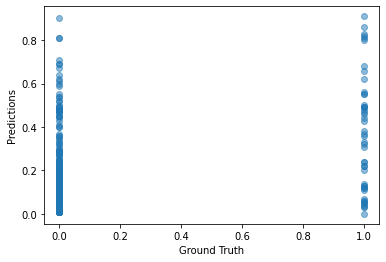

In [199]:
plt.scatter(y_test, predictions, alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();